# 餐廳分群
### 匯入檔案


In [2]:
import pandas as pd
df = pd.read_csv("Independence100.csv", encoding="utf-8")

df

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0


### 針對餐廳分群並賦予意義

In [ ]:
# average check:客單價
# average check = (sales / number of visit)

# 因為不是所有欄位都需要使用，所以我創造一個新欄位，裡面只放我需要的欄位名稱
df1 = pd.DataFrame() #創建的新欄位
df1["x"] = df["Average Check"] #df1資料，來源自原始的df #作為x軸
df1["y"] = df["Sales"] #作為Y軸
df1



,x,y
0,40,39080335.0
1,43,35218364.0
2,33,29104017.0
3,90,26916180.0
4,62,26900000.0
...,...,...
95,80,12194000.0
96,95,12187523.0
97,38,12032014.0
98,52,11965564.0


### 新增視覺化、機器學習套件，主觀上分為3群


In [ ]:
import matplotlib.pyplot as plt #資料視覺化
from sklearn import cluster, datasets, metrics #sklearn機器學習演算法套件
from sklearn.cluster import KMeans

n_cluster = 3 #主觀上想分3群
kmeans = cluster.KMeans(n_cluster).fit(df1) #將df資料試配到KMeans()

### 

In [ ]:
centroids = kmeans.cluster_centers_ #取出各群中心點。分3群所以會有3個點
print(centroids)
cluster_labels = kmeans.labels_ #顯示樣本資料隸屬群集
print(cluster_labels)

# 目前分群對人類肉眼不好解讀，所以以matplotlib繪圖呈現

[[6.47887324e+01 1.52807102e+07]
 [8.22962963e+01 2.31153447e+07]
 [4.15000000e+01 3.71493495e+07]]
[2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


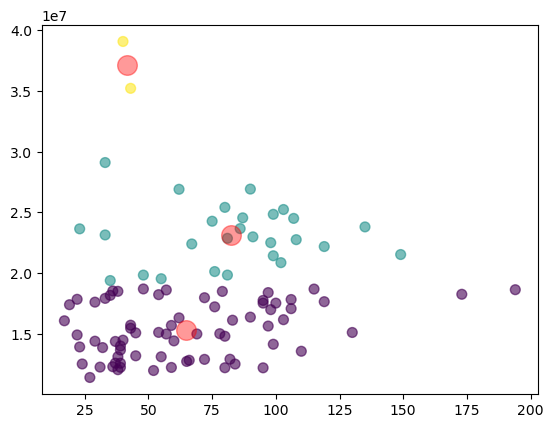

In [ ]:
plt.scatter(df1["x"], df1["y"], c=kmeans.labels_, s=50, alpha=0.6) #取出x, y軸，c=color用kmeans laber上色，s=size資料點大小，alpha透明度
plt.scatter(centroids[:,0], centroids[:,1], c="red", s=200, alpha=0.4) #centroids[:,0]是x陣列，centroids[:,1]是y陣列

### 尋找最適合的分群數

In [14]:
SSE = []
k = range(2,11) #2-10群

for x in k:
    kmeans_optimized = KMeans(n_clusters = x)
    kmeans_optimized.fit(df1)
    SSE.append(kmeans_optimized.inertia_) #inertia_為誤差值。誤差值肯定會因為分群數變多而逐漸降低

In [15]:
SSE

[868666084183099.2,
 497929868392344.25,
 191268278425506.16,
 141173686540079.03,
 78153923332861.73,
 59366637583276.72,
 49330858320072.016,
 46756884780115.266,
 36681246195844.74]

### 繪製圖表視覺化呈現

Text(0, 0.5, 'SSE Value')

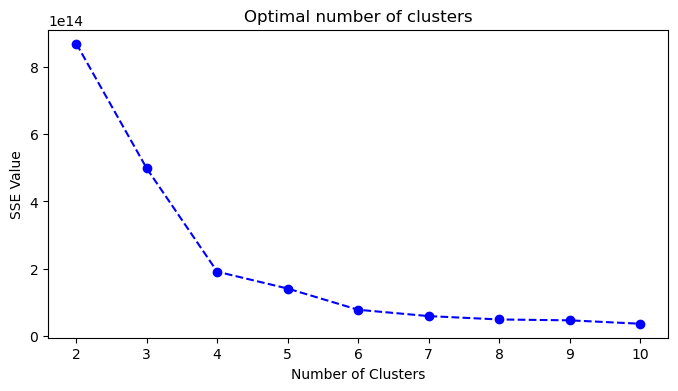

In [16]:
plt.figure(figsize=(8,4)) #figure: 準備一個空白的畫布
plt.plot(k, SSE, "bo--") #'bo--':blue, 樣式為圈圈，--是虛線圖
plt.title("Optimal number of clusters")
plt.xlabel('Number of Clusters')
plt.ylabel('SSE Value')

### 重新畫圖，number of cluster = 4

[[5.59285714e+01 1.36343541e+07]
 [3.86666667e+01 3.44675720e+07]
 [9.01904762e+01 2.36342596e+07]
 [7.48823529e+01 1.79699527e+07]]
[1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


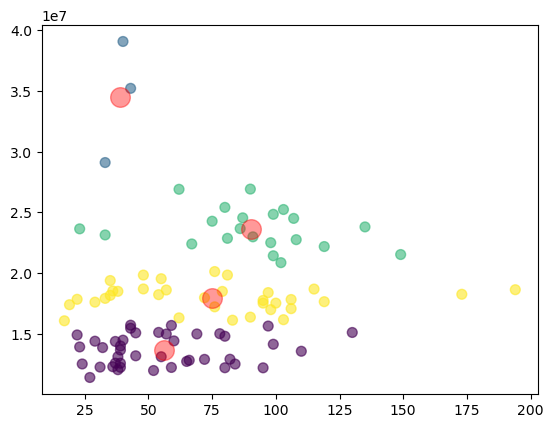

In [17]:
n_cluster = 4
kmeans = cluster.KMeans(n_cluster).fit(df1) 
centroids = kmeans.cluster_centers_ 
print(centroids)
cluster_labels = kmeans.labels_ 
print(cluster_labels)
plt.scatter(df1["x"], df1["y"], c=kmeans.labels_, s=50, alpha=0.6) 
plt.scatter(centroids[:,0], centroids[:,1], c="red", s=200, alpha=0.4)